In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [124]:
def SA(F, T, opc, convR, lB, uB, g, init):
    scale = np.sqrt(T) ## Suggested by Robert & Casella (Intro to MC)
    cur_sol = [init[0], init[1]]
    bounds = [(lB[0],uB[0]),(lB[1],uB[1])]
    print('Pontos iniciais: ', cur_sol)
    best = cur_sol
    convergencia = []
    history = [cur_sol]
    nProg = 0
    i = 0

    def is_feasible(sol):
        x, y = sol
        is_feasible = True
        if not g:  # Se não há restrições
            return is_feasible
        for constraint in g:
            if constraint(x,y) > 0:
                is_feasible = False
        return is_feasible

    while True:
        i+=1
        # Cálculo da vizinhança
        while True:
            new_sol = cur_sol + np.random.uniform(-1, 1, size=2) * scale
            new_sol = np.clip(new_sol, [b[0] for b in bounds], [b[1] for b in bounds])
            if is_feasible(new_sol):
                break

        cur_F = F(cur_sol)
        new_F = F(new_sol)

        # Diferença de Energia
        deltaE = new_F - cur_F

        # Aceitação probabilística
        b = np.random.rand()
        if np.log(b)*T - deltaE < 0: # Caso TRUE, o candidato é descartado
            new_sol = cur_sol  

        cur_sol = new_sol

        if cur_F < F(best):
            best = cur_sol
            nProg = 0
        else:
            nProg += 1
        convergencia.append(F(cur_sol))
        if i > convR:
            del convergencia[0]
            if np.std(convergencia) <= 1e-3:
                print(f'Convergiu em {i} iterações, desvio padrão: {np.std(convergencia)}')
                break

        T = resfriamento(T,i,deltaE, 0.9, 0, opc, nProg)
        history.append(cur_sol)
        
    dicio = {'1': 'Linear', '2': 'Geométrico', '3': 'Logarítimico', '4': 'Híbrido', '5': 'Exponencial', '6': 'Adaptativo', '7': 'Fast'}
    print(f'Escolhido: \n   Resfriamento {dicio[str(opc)]}')
    return cur_sol, history, best
    
def resfriamento(T, k, deltaE, a = 0.75, b = 0, opc = 0, nProg = 0):
    if opc == 1: # Linear
        T = T - a
    elif opc == 2: # Geométrica
        T = a*T
    elif opc == 3: # Logarítimica
        T = (np.log(k)/np.log(k+1)) * T
    elif opc == 4: # Híbrida
        if k <= b:
            T = (k/(k+1))*T
        else:
            T = a*T
    elif opc == 5: # Exponencial - Converge em 10000
        T = T/(1+b*T)
    elif opc == 6: # Adaptativa, ASA
        if nProg > 4:
            a *= 1.1
        else:
            a *= 0.9
        T *= a
    elif opc == 7: # Fast, FSA
        T = T/(1+k)
    return T

Pontos iniciais:  [-4.5, -4.5]
Convergiu em 2371 iterações, desvio padrão: 0.0
Escolhido: 
   Resfriamento Geométrico
Solução encontrada: [-0.02511543  0.0638266 ]
Ponto ótimo real: [0, 0]
Discrepância (Norma Euclidiana): 0.0685902294245302


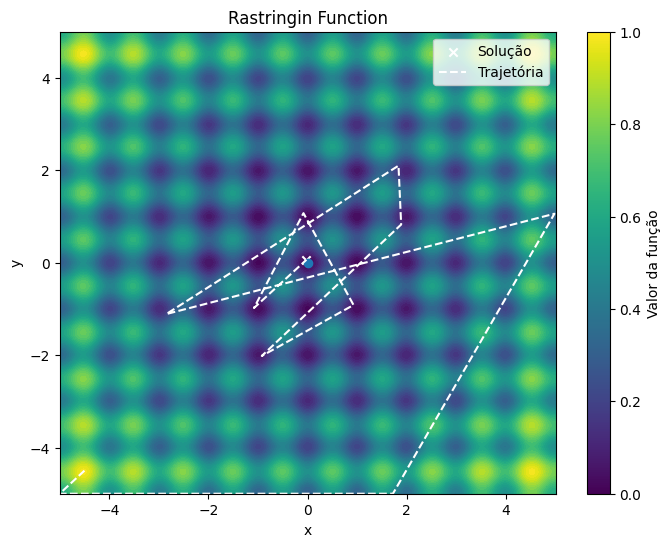

In [132]:
def function(sol):
    x, y = sol
    return 10*2 + x**2 - 10*np.cos(2*np.pi*x) + y**2 - 10*np.cos(2*np.pi*y)

min_point = [0, 0]

xx = np.linspace(-5,5,500)
yy = np.linspace(-5,5,500)

X,Y = np.meshgrid(xx,yy)
sol, history, best = SA(function, T = 100, opc = 2, convR = 800, lB=[-5,-5], uB=[5,5], g = [], init=[-4.5,-4.5])
print(f'Solução encontrada: {sol}\nPonto ótimo real: {min_point}')
print(f'Discrepância (Norma Euclidiana): {np.linalg.norm(sol - min_point)}')

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, function([X,Y]), levels=50, cmap='viridis')
plt.scatter(sol[0], sol[1], marker='x', color='white', label='Solução')
plt.scatter(min_point[0],min_point[1], marker='o')
history_x = [h[0] for h in history]
history_y = [h[1] for h in history]
plt.plot(history_x, history_y, color='white', linestyle='--', label='Trajetória')
plt.colorbar(label='Valor da função')
plt.title('Rastringin Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Pontos iniciais:  [0, 0]
Convergiu em 1828 iterações, desvio padrão: 0.0
Escolhido: 
   Resfriamento Geométrico
Solução encontrada: [-3.13769938 -2.7792171 ]
Ponto ótimo real: [-2.903534, -2.903534]
Discrepância (Norma Euclidiana): 0.265119061515211


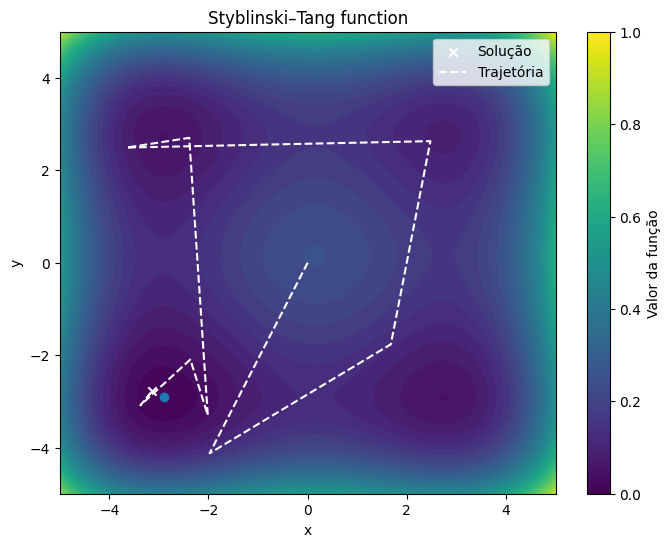

In [133]:
def function(sol):
    x, y = sol
    return (x**4 - 16*x**2 + 5*x + y**4 - 16*y**2 + 5*y)/2

min_point = [-2.903534,-2.903534]

xx = np.linspace(-5,5,500)
yy = np.linspace(-5,5,500)

X,Y = np.meshgrid(xx,yy)
sol, history, best = SA(function, T = 100, opc = 2, convR = 800, lB=[-5,-5], uB=[5,5], g = [], init=[0,0])
print(f'Solução encontrada: {sol}\nPonto ótimo real: {min_point}')
print(f'Discrepância (Norma Euclidiana): {np.linalg.norm(sol - min_point)}')

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, function([X,Y]), levels=50, cmap='viridis')
plt.scatter(sol[0], sol[1], marker='x', color='white', label='Solução')
plt.scatter(min_point[0],min_point[1], marker='o')
history_x = [h[0] for h in history]
history_y = [h[1] for h in history]
plt.plot(history_x, history_y, color='white', linestyle='--', label='Trajetória')
plt.colorbar(label='Valor da função')
plt.title('Styblinski–Tang function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Pontos iniciais:  [-4.5, -4.5]
Convergiu em 1371 iterações, desvio padrão: 0.0
Escolhido: 
   Resfriamento Geométrico
Solução encontrada: [-0.02971632 -0.1333151 ]
Ponto ótimo real: [0, 0]
Discrepância (Norma Euclidiana): 0.1365868775184763


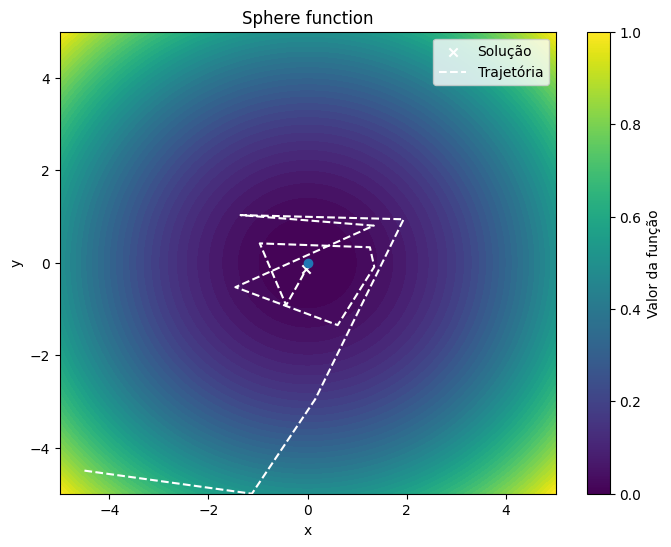

In [134]:
def function(sol):
    x, y = sol
    return x**2 + y**2

min_point = [0,0]

xx = np.linspace(-5,5,500)
yy = np.linspace(-5,5,500)

X,Y = np.meshgrid(xx,yy)
sol, history, best = SA(function, T = 100, opc = 2, convR = 800, lB=[-5,-5], uB=[5,5], g = [], init=[-4.5,-4.5])
print(f'Solução encontrada: {sol}\nPonto ótimo real: {min_point}')
print(f'Discrepância (Norma Euclidiana): {np.linalg.norm(sol - min_point)}')

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, function([X,Y]), levels=50, cmap='viridis')
plt.scatter(sol[0], sol[1], marker='x', color='white', label='Solução')
plt.scatter(min_point[0],min_point[1], marker='o')
history_x = [h[0] for h in history]
history_y = [h[1] for h in history]
plt.plot(history_x, history_y, color='white', linestyle='--', label='Trajetória')
plt.colorbar(label='Valor da função')
plt.title('Sphere function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Pontos iniciais:  [-5, -5]
Convergiu em 1084 iterações, desvio padrão: 2.842170943040401e-14
Escolhido: 
   Resfriamento Geométrico
Solução encontrada: [-3.06915711 -1.51228562]
Ponto ótimo real: [-3.1302468, -1.5821422]
Discrepância (Norma Euclidiana): 0.09280027650310493


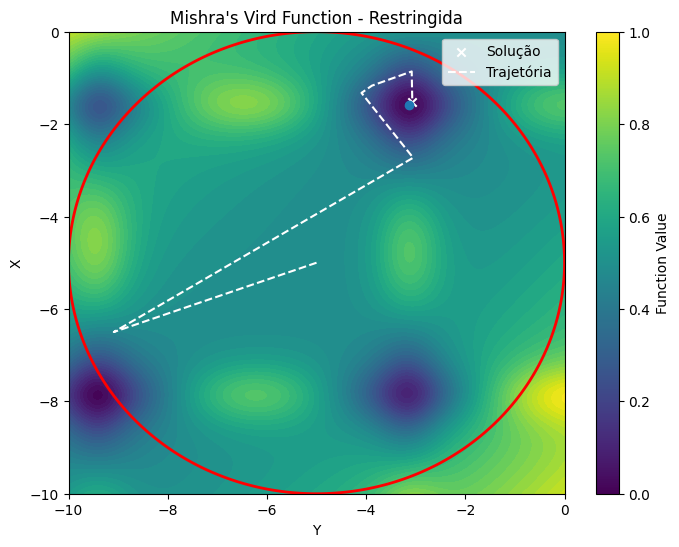

In [ ]:
from scipy.optimize import fsolve

# Definir a função Shekel
def function(sol):
    x,y = sol
    a = np.sin(y)*np.exp((1-np.cos(x))**2)
    b = np.cos(x)*np.exp((1-np.sin(y))**2)
    c = (x-y)**2
    return a + b + c

# Restrição
g1 = lambda x,y: (x+5)**2 + (y+5)**2 - 25

# Avaliar o valor da função no ponto encontrado
min_point = [-3.1302468,-1.5821422]

# Grid for visualization
xx = np.linspace(-10, 0, 500)
yy = np.linspace(-10, 0, 500)
X, Y = np.meshgrid(xx, yy)

Z = function([X,Y])
G = g1(X,Y)

sol, history, best = SA(function, T = 1000, opc = 2, convR = 800, lB=[-10,-6.5], uB=[0,0], g = [g1], init=[-5,-5])
print(f'Solução encontrada: {sol}\nPonto ótimo real: {min_point}')
print(f'Discrepância (Norma Euclidiana): {np.linalg.norm(sol - min_point)}')

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.contour(X, Y, G, levels=[0], colors='red', linewidths=2)
plt.scatter(sol[0], sol[1], marker='x', color='white', label='Solução')
plt.scatter(min_point[0],min_point[1], marker='o')
history_x = [h[0] for h in history]
history_y = [h[1] for h in history]
plt.plot(history_x, history_y, color='white', linestyle='--', label='Trajetória')
plt.colorbar(label='Valor da função')
plt.title("Função de Mishra's Vird com Restrições")
plt.xlabel('Y')
plt.ylabel('X')
plt.legend()
plt.show()

Pontos iniciais:  [2.5, 2]
Convergiu em 2565 iterações, desvio padrão: 2.220446049250313e-16
Escolhido: 
   Resfriamento Geométrico
Solução encontrada: [1.04387539 0.98264719]
Ponto ótimo real: [1, 1]
Discrepância (Norma Euclidiana): 0.04718230630709485


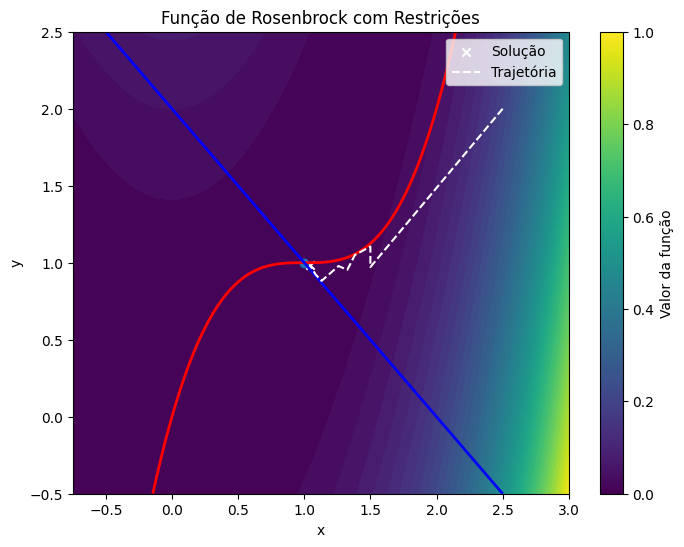

In [210]:
def function(sol):
    x, y = sol
    return (1 - x)**2 + 100 * (y - x**2)**2

# Restriçoes
g1 = lambda x, y: -((x - 1)**3 - y + 1)
g2 = lambda x, y: -(x + y - 2)

min_point = [1,1]

xx = np.linspace(-0.75, 3, 500)
yy = np.linspace(-0.5, 2.5, 500)
X, Y = np.meshgrid(xx, yy)

Z = function([X, Y])
G1 = g1(X, Y)
G2 = g2(X, Y)

sol, history, best = SA(function, T=100, opc=2, convR=1000, lB=[-1.5, -0.5], uB=[1.5, 2.5], g=[g1, g2], init=[2.5, 2])
print(f'Solução encontrada: {sol}\nPonto ótimo real: {min_point}')
print(f'Discrepância (Norma Euclidiana): {np.linalg.norm(sol - min_point)}')

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.contour(X, Y, G1, levels=[0], colors='red', linewidths=2)
plt.contour(X, Y, G2, levels=[0], colors='blue', linewidths=2)
plt.scatter(sol[0], sol[1], marker='x', color='white', label='Solução')
plt.scatter(min_point[0],min_point[1], marker='o')
history_x = [h[0] for h in history]
history_y = [h[1] for h in history]
plt.plot(history_x, history_y, color='white', linestyle='--', label='Trajetória')
plt.colorbar(label='Valor da função')
plt.title('Função de Rosenbrock com Restrições')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Pontos iniciais:  [-1, -1]
Convergiu em 3885 iterações, desvio padrão: 2.220446049250313e-16
Escolhido: 
   Resfriamento Adaptativo
Solução encontrada: [ 0.16828577 -0.74447264]
Ponto ótimo real: [0.08984201, -0.7126564]
Discrepância (Norma Euclidiana): 0.0846504391480425


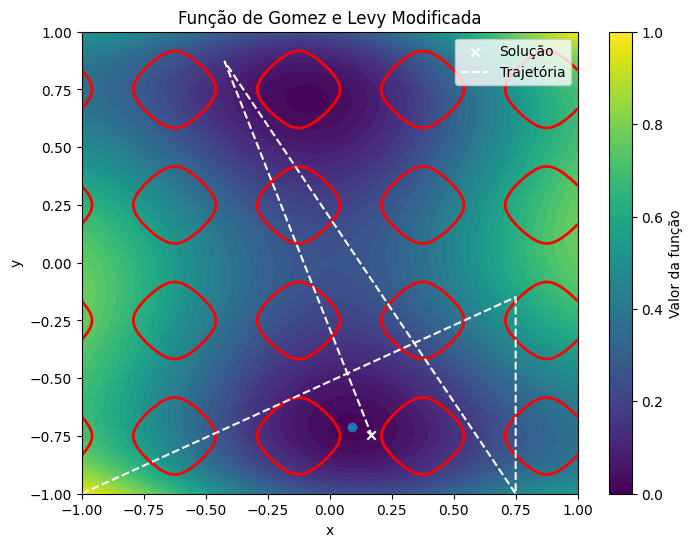

In [197]:
def function(sol):
    x, y = sol
    return 4*x**2 - 2.1*x**4 + (1/3)*x**6 + x*y - 4*y**2 + 4*y**4

# Restriçoes
g1 = lambda x, y: -np.sin(4*np.pi*x)+2*np.sin(2*np.pi*y)**2 - 1.5

min_point = [0.08984201,-0.7126564]

xx = np.linspace(-1, 1, 500)
yy = np.linspace(-1, 1, 500)
X, Y = np.meshgrid(xx, yy)

Z = function([X, Y])
G1 = g1(X, Y)

sol, history, best = SA(function, T=250, opc=6, convR=2000, lB=[-1, -1], uB=[0.75, 1], g=[g1], init=[-1, -1])
print(f'Solução encontrada: {sol}\nPonto ótimo real: {min_point}')
print(f'Discrepância (Norma Euclidiana): {np.linalg.norm(sol - min_point)}')

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.contour(X, Y, G1, levels=[0], colors='red', linewidths=2)
plt.scatter(sol[0], sol[1], marker='x', color='white', label='Solução')
plt.scatter(min_point[0],min_point[1], marker='o')
history_x = [h[0] for h in history]
history_y = [h[1] for h in history]
plt.plot(history_x, history_y, color='white', linestyle='--', label='Trajetória')
plt.colorbar(label='Valor da função')
plt.title('Função de Gomez e Levy Modificada')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()